# Team Sunshine Taylor Swift Emotion Sentiment from X

## Tasks
Here, we have a dataset titled taylor_swift_concert_emotions_updated_with_categories.csv, which contains emotional analysis data related to Taylor Swift's concert experiences. This dataset serves as a substitute for the project reports from students taking KM6312 in the academic year 2024/25, where each project typically discusses a machine learning system for text data.

The provided dataset includes the following:

Emotions: Different categories of emotional responses (e.g., joy, nostalgia, apprehension).
Intensity Levels: Quantitative values capturing the strength of these emotions.
Sentiment Scores: Positive, negative, and neutral sentiment classifications.
Categories: Detailed categorization of the emotions.
We aim to leverage natural language processing (NLP) techniques to analyze this data, deriving meaningful insights about the emotional patterns and sentiment trends captured in the dataset.s of the main text and number of pages. We are going to utilze natural language processing methods to analyze these reports.


1. Basic NLP Techniques:
    * **Tokenization**: breaking text into tokens (words, sentences, n-grams)
    * **Stop word removal**: removing common words
    * **Term Frequency**: computing word importance
    * **[Stemming and lemmatization](https://www.datacamp.com/community/tutorials/stemming-lemmatization-python)**: reducing words to their base form
    * **LDA**: Topic Modelling for Text


In [39]:
import pandas as pd

# Load the dataset  
reports = pd.read_csv('taylor_swift_concert_emotions_updated_with_categories.csv', index_col=None)

# check the first three rows
reports.head(3)

,Emotion,Intensity,positive,negative,neutral,Intensity Category,Emotion Type,Sentiment Score,Time,Emotion Source,Emotional Transition
0,joy,2,1,0,0,Low,Primary,10.0,NaN,NaN,NaN
1,apprehension,7,0,1,0,High,Complex,1.0,NaN,NaN,NaN
2,love,6,1,0,0,Medium,Complex,10.0,NaN,NaN,NaN


#### 1. Preprocess Text Data

In [42]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
stop_english = stopwords.words('english')
# word tokenization
reports['clean_text'] = reports['Emotion'].apply(lambda x: list(x.split(' ')))
# Remove stop words and single character
reports['clean_text'] = reports['clean_text'].apply(lambda x: [w.lower() for w in x if w.lower() not in stop_english and len(w) >=2])
# Text Normalization: [am, is, are] -> be
reports['stemed_clean_text'] = reports['clean_text'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])
# Only stop word removal
final_corpus = reports['clean_text'].tolist()
# Stop word removal and words stem
stemed_final_corpus = reports['stemed_clean_text'].tolist()

[nltk_data] Downloading package stopwords to /Users/zevon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/zevon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/zevon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


####  3. A word cloud to visualize the preprocessed text data
In order to verify whether the preprocessing happened correctly, we can make a word cloud of the content of the reports. This will give us a visual representation of the most common words. Visualisation is key to understanding whether we are still on the right track! In addition, it allows us to verify whether we need additional preprocessing before further analyzing the text data.

Python has a massive number of open libraries! Instead of trying to develop a method to create word clouds ourselves, we'll use Andreas Mueller's wordcloud library.

In [10]:
from collections import Counter
# How many high frequent words are selected
N_top = 5
# store the high frequent words 
top_nwords = []
# check each report 
for final_doc in final_corpus:
    c_doc = Counter(final_doc)
    # obtain top N_top words
    top_words = c_doc.most_common(N_top)
    # a list of tuple
    print(top_words)
    # the first element in tuple is the word
    t_nwords = [w[0] for w in top_words]
    # concatenate the list, e.g., [a,b,c] + [d,a] = [a,b,c,d,a]
    top_nwords = top_nwords + t_nwords

[('joy', 1)]
[('apprehension', 1)]
[('love', 1)]
[('exhilaration', 1)]
[('nostalgia', 1)]
[('dream', 1)]
[('transcendence', 1)]
[('frustration', 1)]
[('dream', 1)]
[('frustration', 1)]
[('frustration', 1)]
[('transcendence', 1)]
[('gratitude', 1)]
[('awe', 1)]
[('relief', 1)]
[('surprise', 1)]
[('sadness', 1)]
[('exhilaration', 1)]
[('apprehension', 1)]
[('euphoria', 1)]
[('surprise', 1)]
[('nostalgia', 1)]
[('cherish', 1)]
[('euphoria', 1)]
[('euphoria', 1)]
[('dream', 1)]
[('exhilaration', 1)]
[('energy', 1)]
[('transcendence', 1)]
[('relief', 1)]
[('nostalgia', 1)]
[('happiness', 1)]
[('love', 1)]
[('anticipation', 1)]
[('happiness', 1)]
[('dream', 1)]
[('euphoria', 1)]
[('self-reflection', 1)]
[('relief', 1)]
[('apprehension', 1)]
[('energy', 1)]
[('energy', 1)]
[('cherish', 1)]
[('happiness', 1)]
[('awe', 1)]
[('nostalgia', 1)]
[('bittersweet', 1)]
[('bittersweet', 1)]
[('relief', 1)]
[('disappointment', 1)]
[('sadness', 1)]
[('surprise', 1)]
[('excitement', 1)]
[('happiness', 1)]

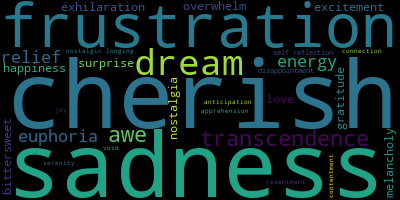

In [30]:
# Import the wordcloud library
import wordcloud

# Join the different processed documents together.
long_string = " ".join(top_nwords)

# Create a WordCloud object
wcloud = wordcloud.WordCloud()

# Generate a word cloud
wcloud.generate(long_string)

# Visualize the word cloud
wcloud.to_image()

##### After Words Stemming 

In [33]:
from collections import Counter
top_nwords = []
for final_doc in stemed_final_corpus:
    c_doc = Counter(final_doc)
    top_words = c_doc.most_common(5)
    print(top_words)
    t_nwords = [w[0] for w in top_words]
    top_nwords = top_nwords + t_nwords

[('joy', 1)]
[('apprehension', 1)]
[('love', 1)]
[('exhilaration', 1)]
[('nostalgia', 1)]
[('dream', 1)]
[('transcendence', 1)]
[('frustration', 1)]
[('dream', 1)]
[('frustration', 1)]
[('frustration', 1)]
[('transcendence', 1)]
[('gratitude', 1)]
[('awe', 1)]
[('relief', 1)]
[('surprise', 1)]
[('sadness', 1)]
[('exhilaration', 1)]
[('apprehension', 1)]
[('euphoria', 1)]
[('surprise', 1)]
[('nostalgia', 1)]
[('cherish', 1)]
[('euphoria', 1)]
[('euphoria', 1)]
[('dream', 1)]
[('exhilaration', 1)]
[('energy', 1)]
[('transcendence', 1)]
[('relief', 1)]
[('nostalgia', 1)]
[('happiness', 1)]
[('love', 1)]
[('anticipation', 1)]
[('happiness', 1)]
[('dream', 1)]
[('euphoria', 1)]
[('self-reflection', 1)]
[('relief', 1)]
[('apprehension', 1)]
[('energy', 1)]
[('energy', 1)]
[('cherish', 1)]
[('happiness', 1)]
[('awe', 1)]
[('nostalgia', 1)]
[('bittersweet', 1)]
[('bittersweet', 1)]
[('relief', 1)]
[('disappointment', 1)]
[('sadness', 1)]
[('surprise', 1)]
[('excitement', 1)]
[('happiness', 1)]

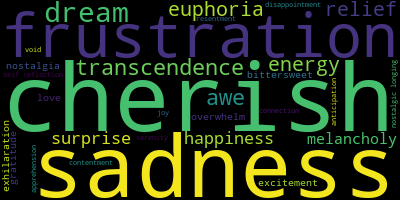

In [35]:
long_string = " ".join(top_nwords)
wcloud = wordcloud.WordCloud()
wcloud.generate(long_string)
wcloud.to_image()

####  4. Prepare the text for LDA analysis
The main text analysis method that we will use is latent Dirichlet allocation (LDA). LDA is able to perform topic detection on large document sets, determining what the main 'topics' are in a large unlabeled set of texts. A 'topic' is a collection of words that tend to co-occur often. The hypothesis is that LDA might be able to clarify what the different topics in the report are. These topics can then be used as a starting point for further analysis.

LDA does not work directly on text data. First, it is necessary to convert the documents into a simple vector representation. This representation will then be used by LDA to determine the topics. Each entry of a 'document vector' will correspond with the number of times a word occurred in the document. In conclusion, we will convert a list of titles into a list of vectors, all with length equal to the vocabulary. For example, 'Analyzing machine learning trends with neural networks.' would be transformed into [1, 0, 1, ..., 1, 0].

We'll then plot the 10 most common words based on the outcome of this operation (the list of document vectors). As a check, these words should also occur in the word cloud.

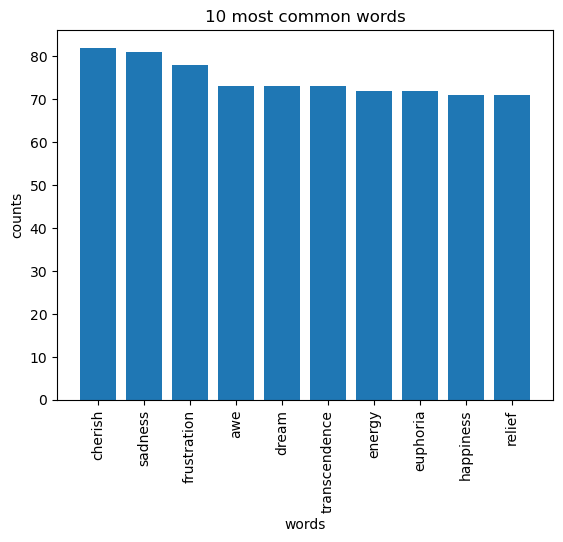

In [24]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer()

all_cleancorpus = [' '.join(x) for x in stemed_final_corpus]
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(all_cleancorpus)

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [26]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 6

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
awe dream happiness surprise excitement love

Topic #1:
sadness frustration energy nostalgia disappointment contentment

Topic #2:
euphoria melancholy gratitude anticipation joy connection

Topic #3:
cherish relief bittersweet nostalgic longing resentment

Topic #4:
transcendence overwhelm exhilaration serenity apprehension void


In [45]:
# Add a thank you message
from IPython.display import Markdown

# Display the thank you message
Markdown("### Thank you for exploring this notebook!")

### Thank you for exploring this notebook!

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv('taylor_swift_concert_emotions_updated_with_categories.csv')

# Preprocessing: Select features and target
X = df['Emotion']  # Feature: Emotion text
y = df['Intensity Category']  # Target: Intensity category

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical format using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)  # You can adjust `max_features` as needed
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Initialize and train a model (e.g., Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

        High       0.41      0.69      0.51       165
         Low       0.27      0.15      0.19       118
      Medium       0.25      0.12      0.16       117

    accuracy                           0.36       400
   macro avg       0.31      0.32      0.29       400
weighted avg       0.32      0.36      0.32       400

Accuracy: 0.365


[nltk_data] Downloading package stopwords to /Users/zevon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


        Emotion
0           joy
1  apprehension
2          love
3  exhilaration
4     nostalgia
Index(['Emotion'], dtype='object')
0             joy
1    apprehension
2            love
3    exhilaration
4       nostalgia
Name: cleaned_text, dtype: object


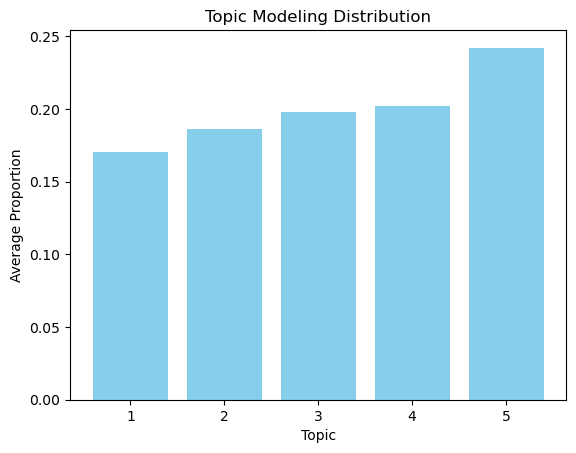

In [46]:
#### Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords
nltk.download('stopwords')

# Load dataset
file_path = pd.read_csv('taylor_swift_concert_emotions_updated.csv')
data = pd.read_csv('taylor_swift_concert_emotions_updated.csv')

print(data.head())
print(data.columns)  # List all column names

text_column = 'Emotion'  # Replace with the name of the column containing text
if text_column not in data.columns:
    raise ValueError(f"Column '{text_column}' not found in the dataset!")

# Preprocessing: Remove punctuation, stopwords, and lowercase the text
def preprocess_text(text):
    if not isinstance(text, str):
        raise ValueError(f"Expected string data but got: {type(text)}")
    stop_words = set(stopwords.words('english'))
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Apply preprocessing
data['cleaned_text'] = data[text_column].dropna().apply(preprocess_text)

# Debug: Check cleaned text
print(data['cleaned_text'].head())

# Convert text data into a document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(data['cleaned_text'])

# Apply Latent Dirichlet Allocation (LDA)
num_topics = 5  # Define the number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

# Visualize topic distributions
topic_distribution = lda.transform(dtm)

# Summarize topic proportions
average_topic_proportions = topic_distribution.mean(axis=0)

# Plot the distribution
plt.bar(range(1, num_topics + 1), average_topic_proportions, color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Average Proportion')
plt.title('Topic Modeling Distribution')
plt.xticks(range(1, num_topics + 1))
plt.show()


[nltk_data] Downloading package stopwords to /Users/zevon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


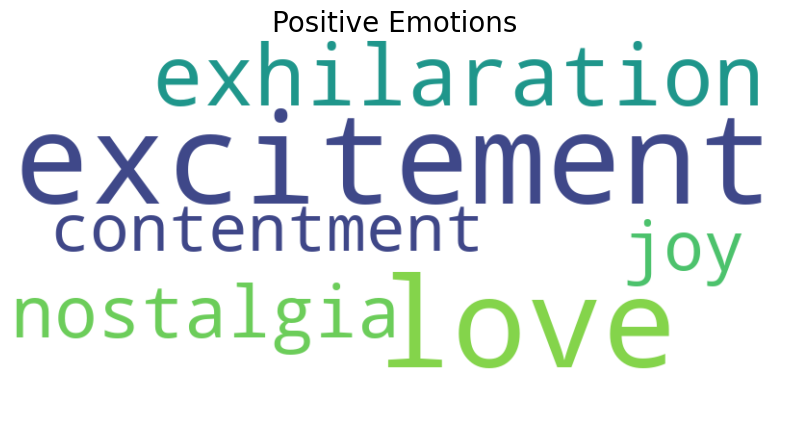

In [91]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords
nltk.download('stopwords')

# Load dataset
file_path = r'/Users/zevon/Downloads/Team Sunshine X/Taylor_Swift_Concert_Positive.csv'
data = pd.read_csv(file_path)


text_column = 'Emotion'  
if text_column not in data.columns:
    raise ValueError(f"Column '{text_column}' not found in the dataset!")

# Preprocessing: Remove punctuation, stopwords, and lowercase the text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Apply preprocessing
data['cleaned_text'] = data[text_column].dropna().apply(preprocess_text)

# Join all cleaned text into a single string for word cloud generation
all_text = ' '.join(data['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title("Positive Emotions", fontsize=20)
plt.show()


[nltk_data] Downloading package stopwords to /Users/zevon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


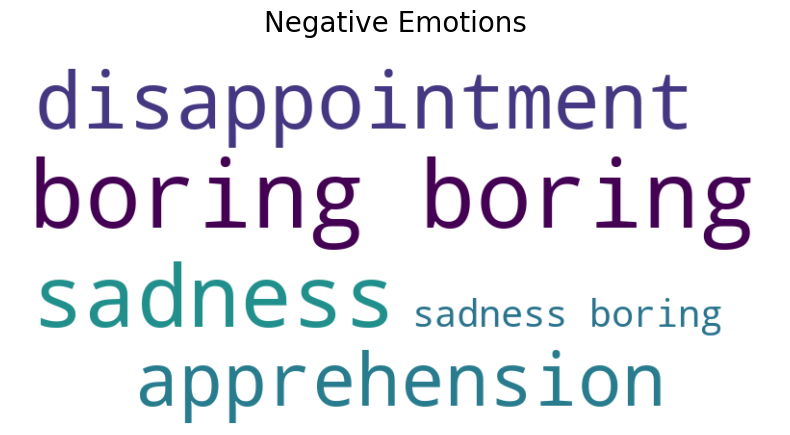

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords
nltk.download('stopwords')

# Load dataset
file_path = r'/Users/zevon/Downloads/Team Sunshine X/Taylor_Swift_Concert_Negative.csv'
data = pd.read_csv(file_path)


text_column = 'Emotion'  
if text_column not in data.columns:
    raise ValueError(f"Column '{text_column}' not found in the dataset!")

# Preprocessing: Remove punctuation, stopwords, and lowercase the text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Apply preprocessing
data['cleaned_text'] = data[text_column].dropna().apply(preprocess_text)

# Join all cleaned text into a single string for word cloud generation
all_text = ' '.join(data['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title("Negative Emotions", fontsize=20)
plt.show()

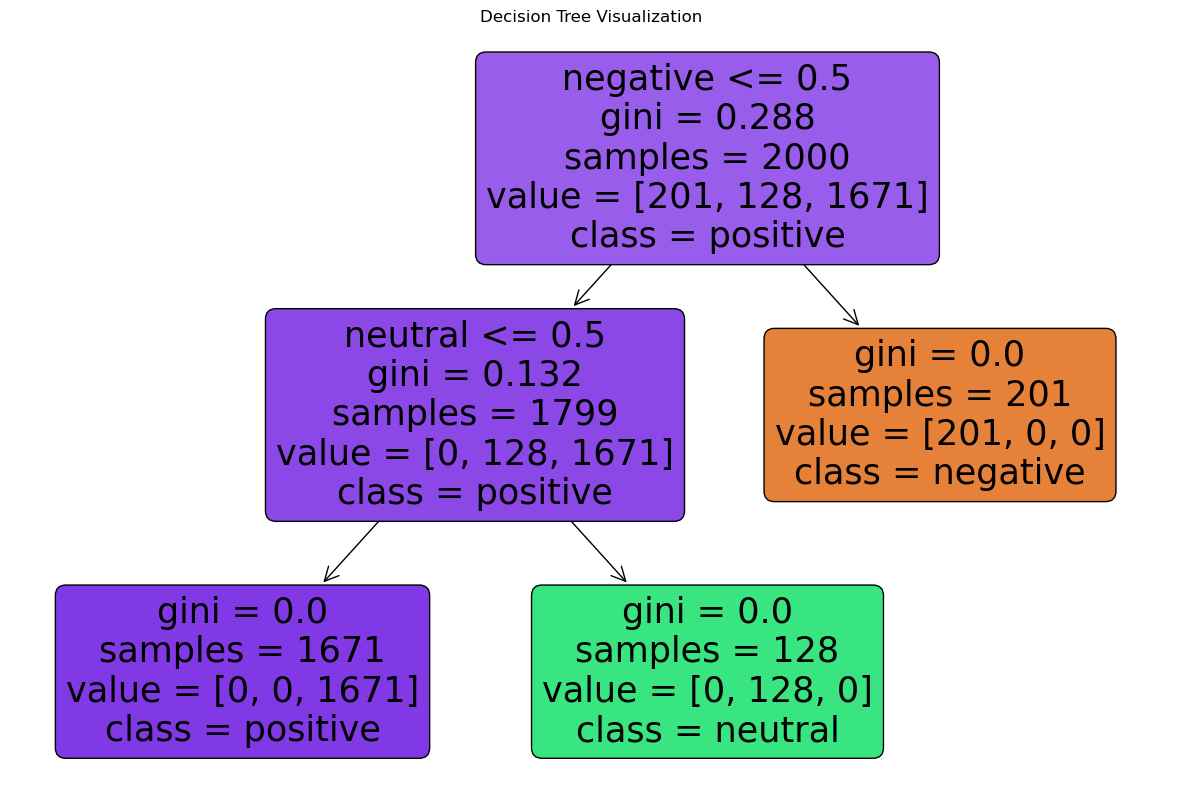

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

reports = pd.read_csv('taylor_swift_concert_emotions_updated_with_categories.csv', index_col=None)

# Ensure correct feature selection and target preparation
features = ['positive', 'negative', 'neutral']
X = reports[features]  # Ensure these columns exist in your DataFrame
y = reports[features].idxmax(axis=1)  # Ensure idxmax is applied to a DataFrame

# Train a Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)

# Plot the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(tree_clf, feature_names=features, class_names=tree_clf.classes_, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

/var/folders/2n/bkl_3mrd4_xfqrzq4flc6fmm0000gn/T/ipykernel_19906/2068871083.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y='Intensity', data=reports, palette="Set3")


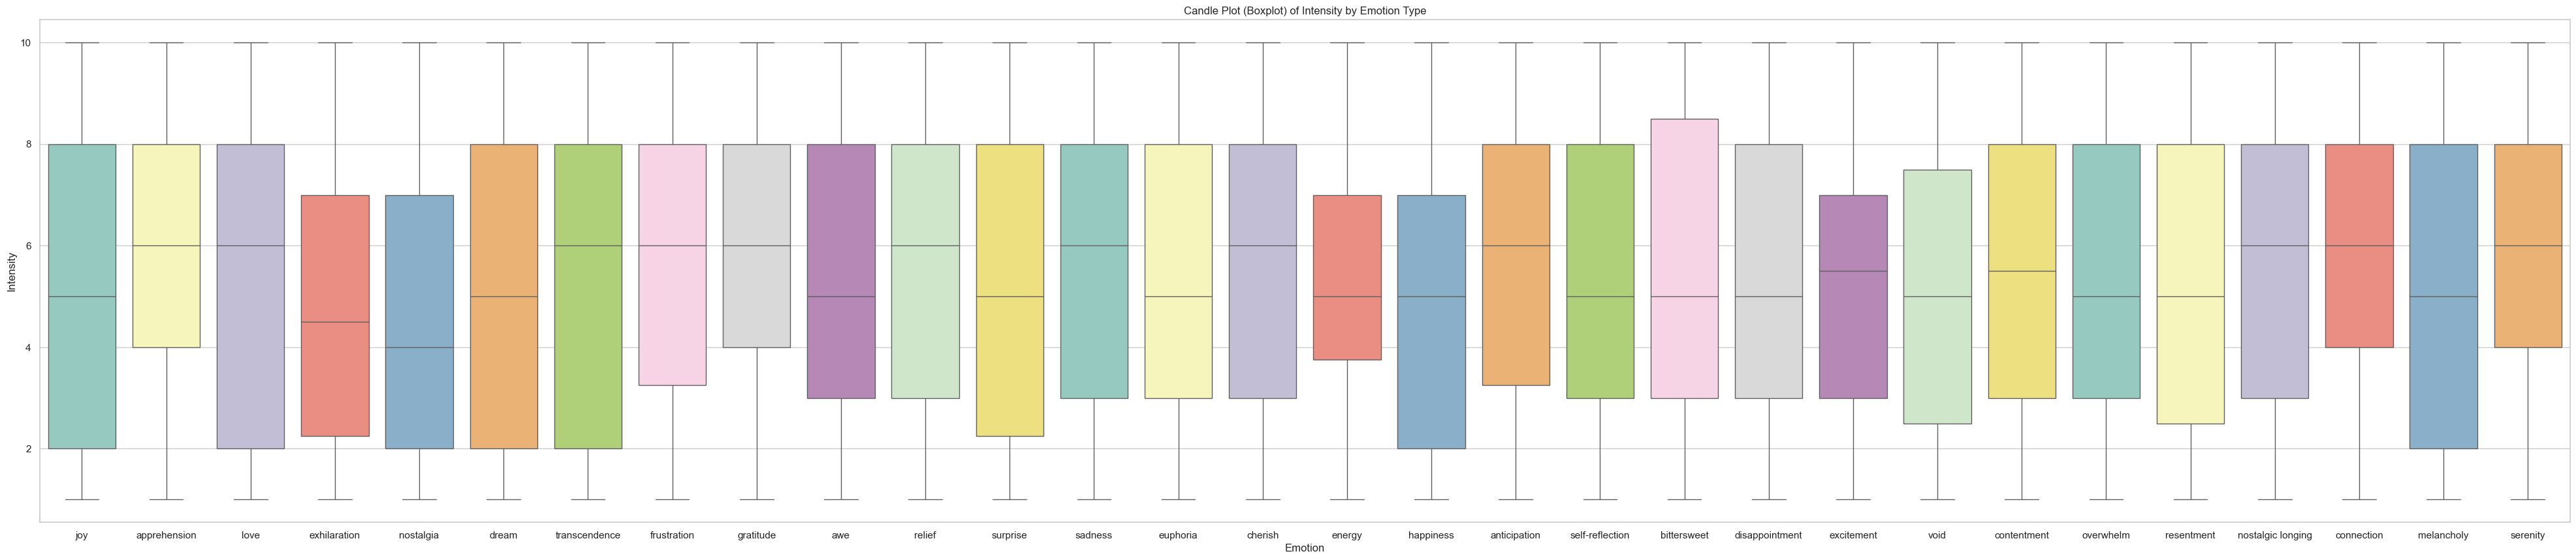

In [40]:
import seaborn as sns
reports = pd.read_csv('taylor_swift_concert_emotions_updated_with_categories.csv', index_col=None)
# Candle Plot (Boxplot) for Intensity Analysis
sns.set(style="whitegrid")
plt.figure(figsize=(50, 10))
sns.boxplot(x='Emotion', y='Intensity', data=reports, palette="Set3")
plt.title('Candle Plot (Boxplot) of Intensity by Emotion Type')
plt.show()


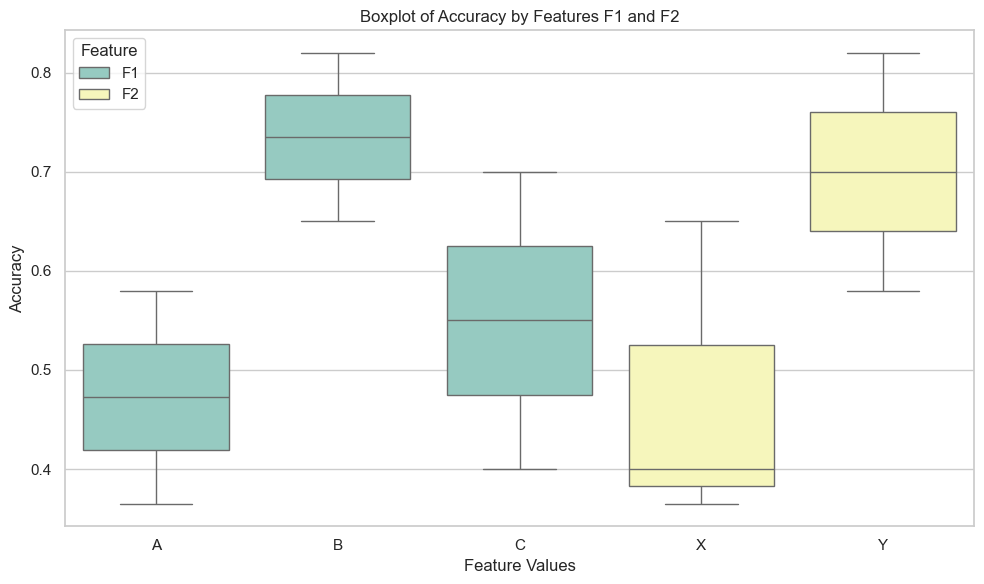

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example Dataset
data = pd.DataFrame({
    'F1': ['A', 'A', 'B', 'B', 'C', 'C'],
    'F2': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
    'Accuracy': [0.365, 0.58, 0.65, 0.82, 0.4, 0.7]
})

# Melt data for a long format suitable for boxplot
melted_data = data.melt(id_vars='Accuracy', value_vars=['F1', 'F2'], var_name='Feature', value_name='Value')

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Value', y='Accuracy', hue='Feature', data=melted_data, palette="Set3")
plt.title('Boxplot of Accuracy by Features F1 and F2')
plt.xlabel('Feature Values')
plt.ylabel('Accuracy')
plt.legend(title='Feature')
plt.tight_layout()
plt.show()

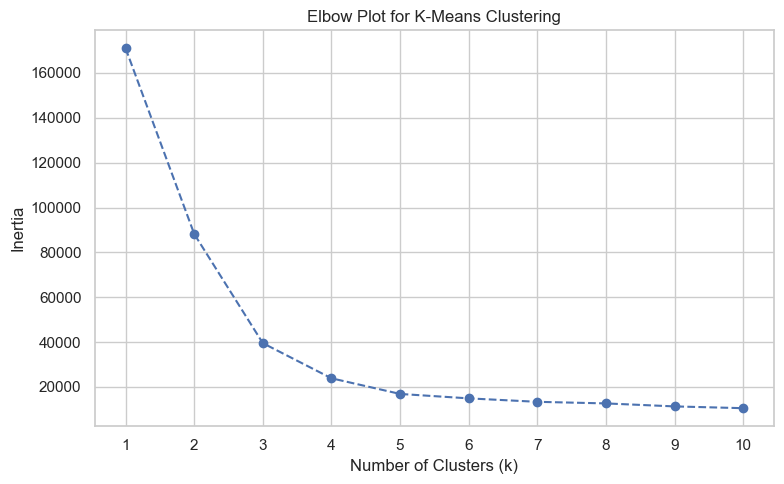

In [78]:
# Elbow Plot for Clustering (K-Means)
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate or Load Dataset
# Replace this with your dataset
X, _ = make_blobs(n_samples=2000, centers=8, cluster_std=2.0, random_state=42)

# Calculate inertia for different numbers of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Plot for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()


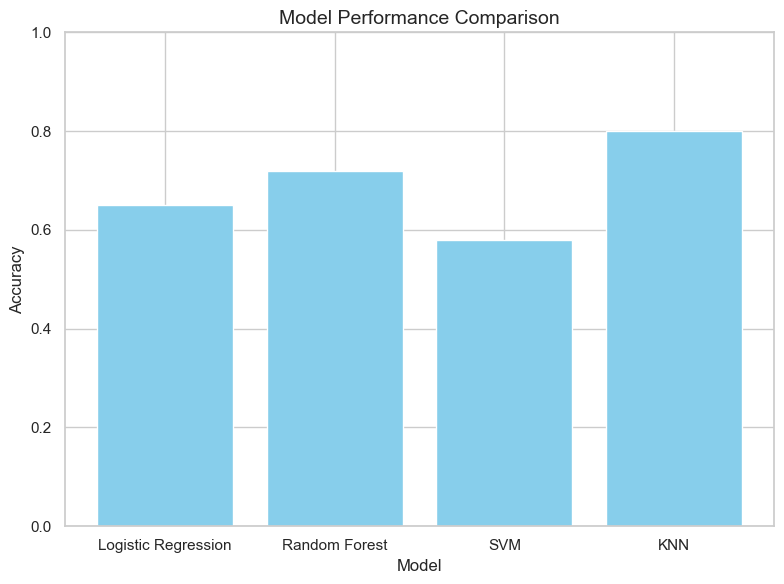

In [88]:
import matplotlib.pyplot as plt

# Example Data: Model Performance
models = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN']
accuracies = [0.65, 0.72, 0.58, 0.80]

# Create Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color='skyblue')

# Add Titles and Labels
plt.title('Model Performance Comparison', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)  # Setting the y-axis range from 0 to 1 (percentage scale)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
